# Technology focus: 10x Genomics Visium
This notebook will present a rough overview of the plotting functionalities that `spatialdata` implements for Visium data.

## Loading the data
Please download the data from here: [Visium dataset](https://s3.embl.de/spatialdata/spatialdata-sandbox/visium.zip) and rename it (eventually using symlinks) to `visium_brain.zarr`.


In [1]:
visium_zarr_path = "./visium_brain.zarr"

In [2]:
import spatialdata as sd

visium_sdata = sd.read_zarr(visium_zarr_path)
visium_sdata

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SpatialData object with:
├── Images
│     ├── 'ST8059050_image': SpatialImage[cyx] (3, 2000, 1968)
│     └── 'ST8059051_image': SpatialImage[cyx] (3, 2000, 1963)
├── Shapes
│     ├── 'ST8059050_shapes': GeoDataFrame shape: (3497, 2) (2D shapes)
│     └── 'ST8059051_shapes': GeoDataFrame shape: (2409, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 5906 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'annotating', 'library', 'spot_id'
    uns: 'spatialdata_attrs': AnnData (5906, 31053)
with coordinate systems:
▸ 'ST8059050', with elements:
        ST8059050_image (Images), ST8059050_shapes (Shapes)
▸ 'ST8059051', with elements:
        ST8059051_image (Images), ST8059051_shapes (Shapes)

## Visualise the data
We're going to create a naiive visualisation of the data, overlaying the Visium spots and the tissue images. For this, we need to load the `spatialdata_plot` library which extends the `sd.SpatialData` object with the `.pl` module. 

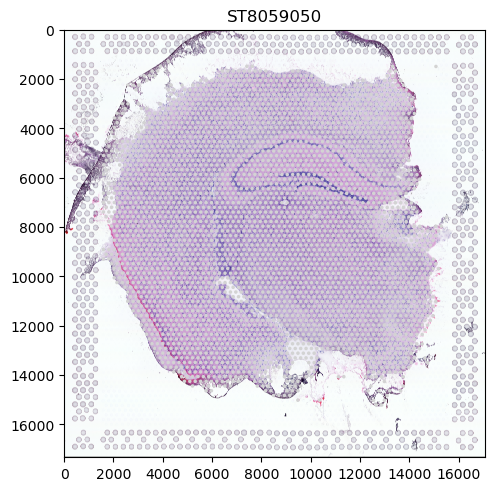

In [3]:
import spatialdata_plot

visium_sdata.pl.render_images().pl.render_shapes().pl.show("ST8059050")

We can see that the data contains two coordinate systems (`ST8059050` and `ST8059052`) with image and spot information each. In `SpatialData`, these spots are represented as `Shapes`. When giving no further parameters, one panel is generated per coordinate system with the members that have been specified in the function call. We can see that the spots are aligned to the tissue representation which is also respected by the plotting logic.

However, the spots are all grey since we have not provided any information on what they should encode. Such information can be found in the `Table` attribute (which is an `anndata.AnnData` table) of the `SpatialData` object, either in the data itself or the `obs` attribute.

In [4]:
visium_sdata.table.to_df().sum(axis=0).sort_values(ascending=False).head(10)
# We will select some of the highly expressed genes for this example

mt-Co3     3445329.0
mt-Co1     3214796.0
mt-Atp6    2351509.0
mt-Co2     2264612.0
mt-Cytb    1439108.0
mt-Nd4     1223255.0
mt-Nd1     1067596.0
mt-Nd2      972418.0
Ttr         971327.0
Fth1        764443.0
dtype: float32

In [5]:
visium_sdata.table.obs.head(3)

,in_tissue,array_row,array_col,annotating,library,spot_id
AAACAAGTATCTCCCA-1,1,50,102,ST8059051_shapes,ST8059051,0
AAACAGAGCGACTCCT-1,1,14,94,ST8059051_shapes,ST8059051,1
AAACCGGGTAGGTACC-1,1,42,28,ST8059051_shapes,ST8059051,2


### Color the visium spots by gene expression
To use this information in our plot, we pass the name of the column by which we want to color our expression to `color`. Furthermore, we are going to subset the data to only one coordinate system.

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  obs[column] = c
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  obs[column] = c


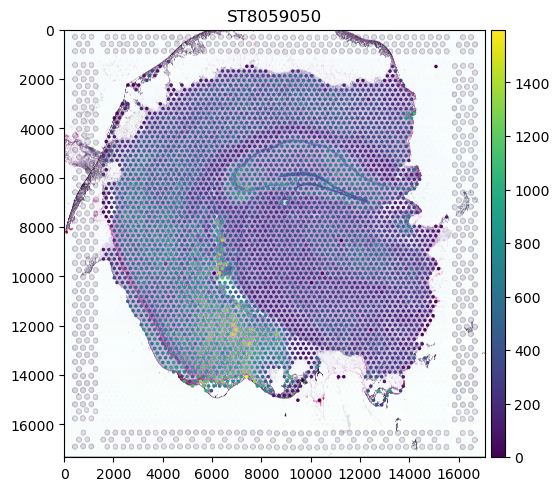

In [6]:
(visium_sdata.pp.get_elements("ST8059050").pl.render_images().pl.render_shapes(color="mt-Co3").pl.show())

We can also provide `ax` objects to `spatialdata_plot` for further customisation.

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  obs[column] = c
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  obs[column] = c
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  obs[column] = c
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_utils.py:212: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.

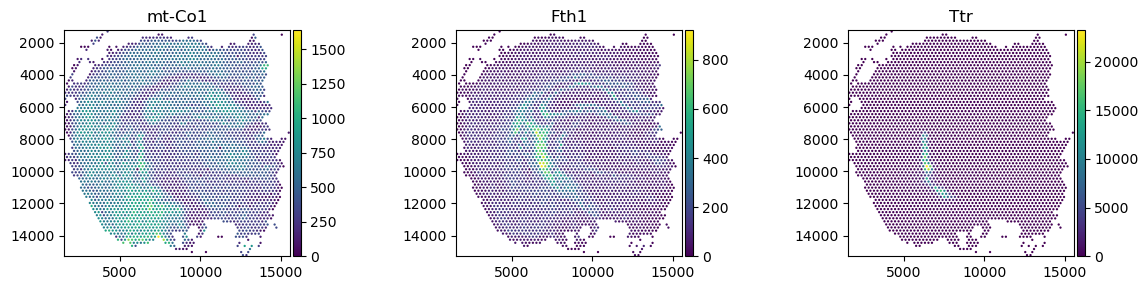

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))

visium_sdata_subset = visium_sdata.pp.get_elements("ST8059050")

visium_sdata_subset.pl.render_shapes(color="mt-Co1").pl.show(ax=axs[0], title="mt-Co1")

visium_sdata_subset.pl.render_shapes(color="Fth1").pl.show(ax=axs[1], title="Fth1")

visium_sdata_subset.pl.render_shapes(color="Ttr").pl.show(ax=axs[2], title="Ttr")

plt.tight_layout()